<xarray.Dataset>
Dimensions:  (DEPTH: 1, LAT: 1, LON: 1, TIME: 744)
Coordinates:
  * LON      (LON) float32 67.0
  * LAT      (LAT) float32 -12.0
  * DEPTH    (DEPTH) float32 12.0
  * TIME     (TIME) datetime64[ns] 2016-07-01 ... 2016-07-31T23:00:00
Data variables:
    U        (TIME, DEPTH, LAT, LON) float64 ...
Attributes:
    history:      PyFerret V7.63 (optimized) 18-Nov-21
    Conventions:  CF-1.6
<xarray.DataArray 'U' (TIME: 744)>
array([-25.065491, -19.295563, -22.580399, ...,  -8.522403,  -7.866806,
        -4.072201])
Coordinates:
    LON      float32 67.0
    LAT      float32 -12.0
    DEPTH    float32 12.0
  * TIME     (TIME) datetime64[ns] 2016-07-01 ... 2016-07-31T23:00:00
Attributes:
    long_name:  U_320[L=@FLN]
    history:    From cur_juy_hr


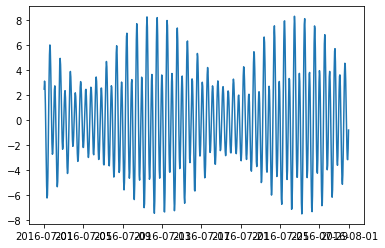

In [110]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pytide
import pandas as pd
import datetime as dt

data=xr.open_dataset("u.nc")
print (data)
time=data["TIME"].values

t = time.astype('datetime64[s]')


#print (t)

h = data['U'][:,0,0,0]     

wt = pytide.WaveTable(["M2", "S2", "K1","O1"])

f, vu = wt.compute_nodal_modulations(t)

w = wt.harmonic_analysis(h, f, vu)

hp=wt.tide_from_tide_series(t,w)

print (h)

plt.plot(t,hp)
